# Il clustering
Il clustering è un problema dell'apprendimento non supervisionato, la classe di problemi affrontati dal machine learning in cui non abbiamo a disposizione dei dati di esempio per l'addestramento di un modello.
Il clustering è molto simile alla classificazione, l'unica differenza è che gli esempi non sono labellizati, quindi bisogna trovare una strada alternativa per raggruppare gli esempi in classi (clusters)<br>

# k-means
Il k-means è un metodo che affronta il problema del clustering in maniera molto semplice.
 1. Scegliamo un numero k di clusters in cui vogliamo dividere il dataset.
 2. Scegliamo casualmente k centroidi.
 3. Per ogni esempio nel dataset, utilizziamo una metrica di distanza (come la distanza euclidea) per assegnare l'apparteneza di un esempio al cluster rappresentato dal centroide più vicino.
 4. Ricalcoliamo i centroidi come i punti medi per ogni cluster.
 5. Se almeno un esempio ha cambiato cluster ripetiamo tornando al punto 3, altrimenti il modello è pronto.
 
In questo notebook utilizzeremo il k-means per raggruppare il clusters un dataset creato da noi.<br>
Importiamo matplotlib e seaborn per visualizzare il dataset.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12, 8)
sns.set()

Utilizziamo la funzione make_blobs di sklearn per creare un dataset composto da 500 esempi.

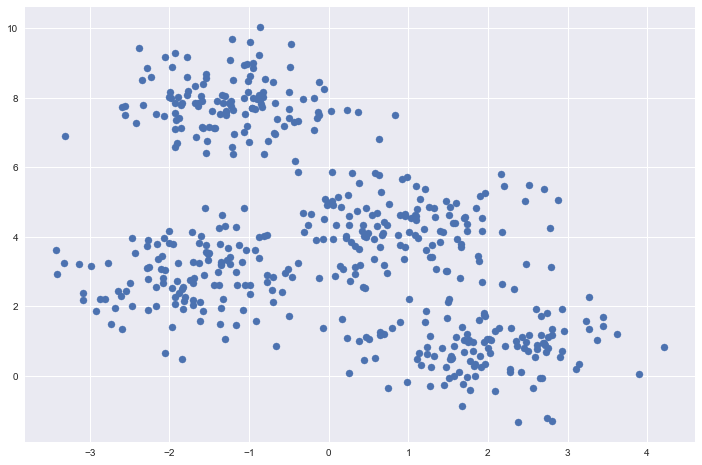

In [15]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=.8, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

Adesso utilizziamo la classe KMeans di sklearn per creare i nostri clusters

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Visualizziamo il risultato del k-means e mostriamo su grafico anche i centroidi finali

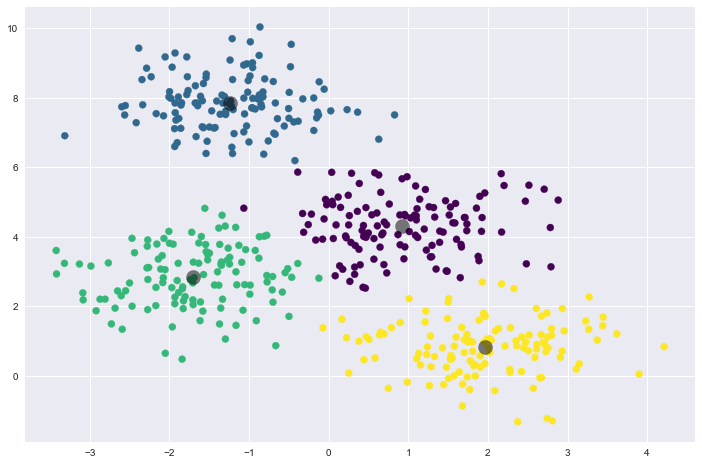

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

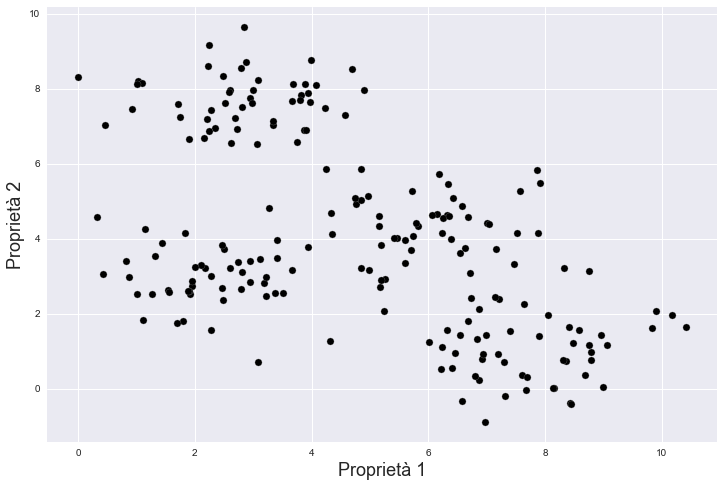

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12, 8)
sns.set()

from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=200, centers=4,
                       cluster_std=.8, random_state=0)

X[:,0]+=abs(X[:,0].min())
X[:,0]*=1.42
#plt.xticks([])
#plt.yticks([])

plt.ylabel("Proprietà 2",fontsize=18)
plt.xlabel("Proprietà 1",fontsize=18)


plt.scatter(X[:, 0], X[:, 1], s=50, c="black", edgecolors="gray");

plt.savefig("cluster_step_"+str(0)+".png")

In [244]:
import numpy as np

def kMeans(X, K, maxIters = 10, plot_progress = None):

    centroids = X[np.random.choice(np.arange(len(X)), K), :]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])
        # Move centroids step
        centroids = [X[C == k].mean(axis = 0) for k in range(K)]
        if plot_progress != None: plot_progress(X, C, np.array(centroids))
    return np.array(centroids) , C

C,y=kMeans(X,4,maxIters=2)

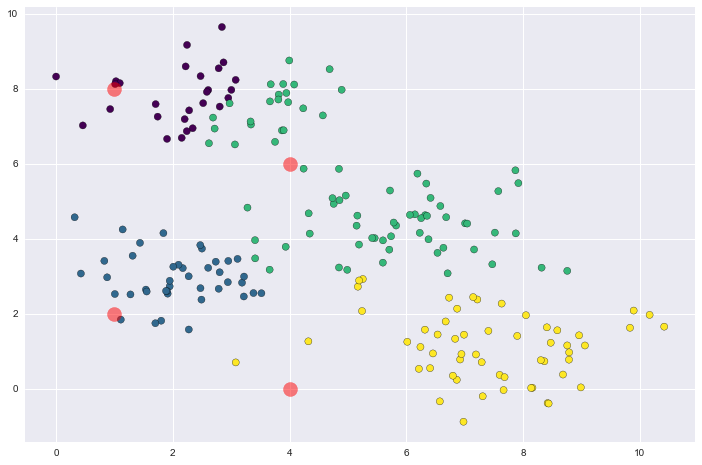

In [44]:
import numpy as np

K = 4

centroids = np.array([[1.,8.],[1.,2.],[4.,6.],[4.,0.]])
    
C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])    
    
plt.scatter(X[:, 0], X[:, 1], c=C, s=50, cmap='viridis', edgecolors="black")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5);
plt.show()

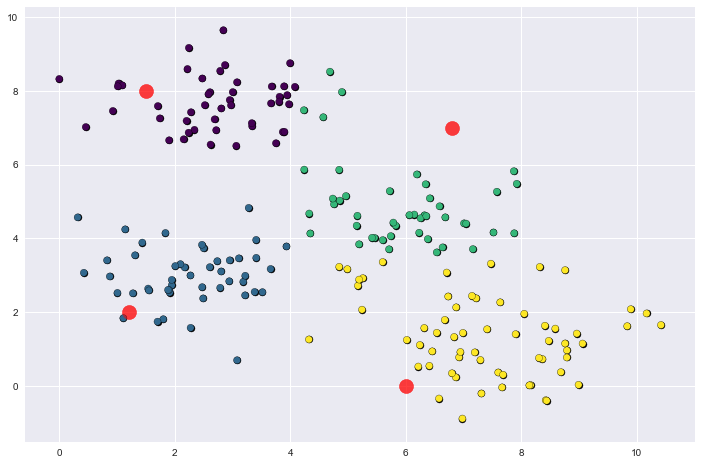

/Users/giuseppe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


1 samples changed cluster
Continue ? [yes/no])]


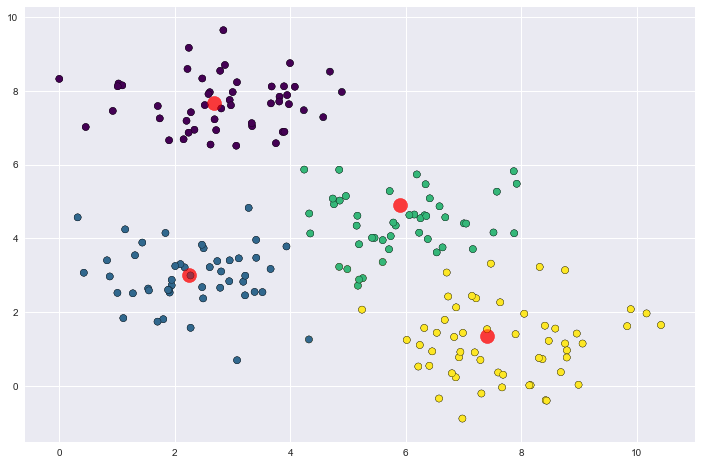

11 samples changed cluster
Continue ? [yes/no])]


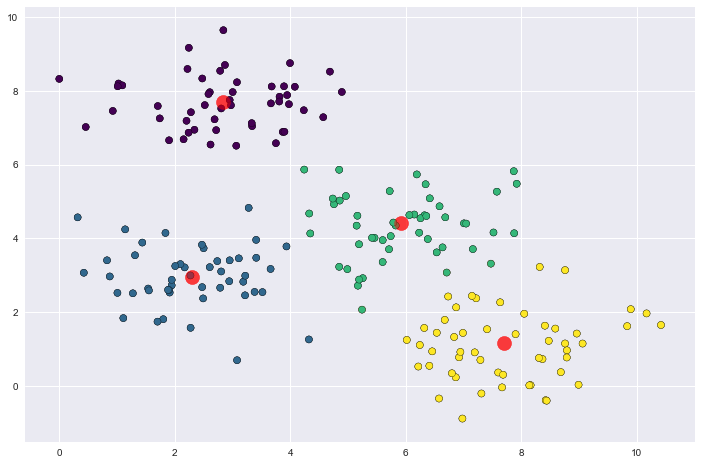

3 samples changed cluster
Continue ? [yes/no])]


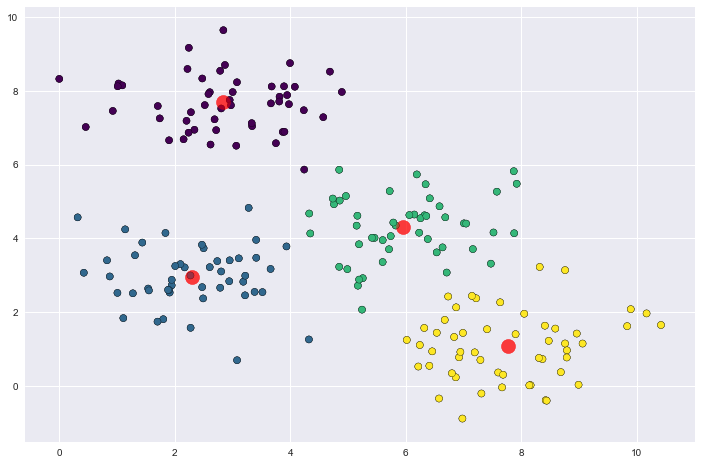

1 samples changed cluster
Continue ? [yes/no])]


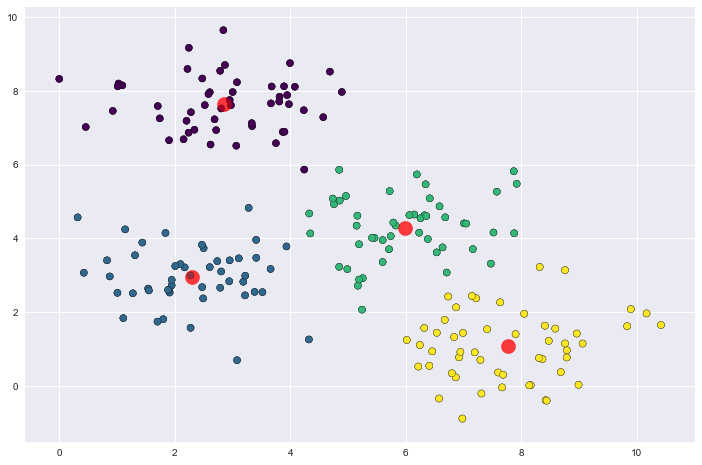

0 samples changed cluster


In [ ]:
import numpy as np
go = ""

K = 4

#centroids = X[np.random.choice(np.arange(len(X)), K), :]
centroids = np.array([[1.5,8.],[1.2,2.],[6.8,7.],[6.,0.]])

i = 1

while(go!="no"):

    
    if(i==1):
        C_prev = "black"
    
    plt.scatter(X[:, 0], X[:, 1], c=C_prev, s=50, cmap='viridis', edgecolors="black")
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5);
    plt.savefig("kmeans/kmeans_centroids_"+str(i)+".png")
    
    C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])    
    
    plt.scatter(X[:, 0], X[:, 1], c=C, s=50, cmap='viridis', edgecolors="black")
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5);
    plt.savefig("kmeans/kmeans_clusters_"+str(i)+".png")
    plt.show()
    
    centroids = np.array([X[C == k].mean(axis = 0) for k in range(K)])  
    print("%d samples changed cluster" % (np.count_nonzero(C!=C_prev)))
    C_prev = C
    i+=1
    go=input("Continue ? [yes/no])]")



In [38]:
X

array([[ 3.28753606,  3.35928158],
       [ 0.43736878,  8.04910071],
       [ 4.30501035,  4.40112734],
       [ 3.82013811,  4.60631734],
       [ 4.68041271,  5.26569121],
       [ 3.38631871,  4.06194513],
       [ 0.50402553,  4.44593422],
       [ 2.23119096,  7.90550101],
       [ 2.33116401,  5.86440764],
       [ 1.17630884,  7.64395667],
       [ 1.98375953,  6.54189518],
       [ 0.67148203,  6.59964314],
       [ 1.44022806,  6.90098522],
       [ 1.89027564,  7.69822295],
       [ 2.1571188 ,  7.31463954],
       [ 6.28169817, -0.18054359],
       [ 3.83667888,  2.45256061],
       [ 3.09952189,  3.67346585],
       [ 0.65353995,  2.94334671],
       [ 5.68669816, -0.090197  ],
       [ 5.51198387,  3.14029479],
       [ 0.55367939,  7.48520398],
       [ 0.57707321,  3.34928161],
       [ 5.14770756, -0.33133129],
       [ 2.97980692,  4.61330933],
       [ 1.11424405,  2.38709963],
       [ 2.7313597 ,  4.10229409],
       [ 3.41785045,  4.4288665 ],
       [ 5.96577936,

In [52]:
A = np.array([1,2,3])
B = np.array([1,2,4])

np.count_nonzero(A!=B)

1